# Capstone 1: Chemicals in Agriculture

# Part 1: Data


The data used in this report comes from Kaggle.com (https://www.kaggle.com/usgs/pesticide-use). All data was pulled from the United States Department of Agriculture Crop Reporting Districts and reports agricultural chemical use in unit pounds. The dataset includes two years of chemical use data as well as a dictionary that defines the state and county codes. Also used in this report is a dataset(df3) containing information about state size that comes from the US Census Bureau (https://www.census.gov/geographies/reference-files/2010/geo/state-area.html). This data was downloaded directly from the website into Excel and uploaded to this notebook. 

As can be seen by the chemical use datasets (df1/df2), there are two methods of measurement in use - low estimate and high estimate. When a district was surveyed and chemical use was not reported, low estimates assumed zero use. However, in the same situations, high estimates estimated chemical usage from neighboring locations within the same region. For the sake of simplicity for this report, the low estimates will be ignored. When exploring the data it was discovered that California data is missing from the 2015 data and there are a total of 413 chemical compounds reported in the dataset. 

The datasets described in this report are significant because they help bring US agricultural chemical use into perspective. The data in these datasets shows exactly which chemicals are being used and where they are most prevalent. Public backlash against certain agricultural chemicals has been growing recently so exploring the data is necessary and relevant to the times. 

In [1]:
#import the proper packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#upload the dataframes used in this project
df1 = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\pesticide-use\2015.csv')
df2 = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\pesticide-use\2014.csv')
df3 = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\state square miles.csv')
df4 = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\pesticide-use\dictionary.csv')

In [2]:
#preview the dataset
df1.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,1-Methyl Cyclopropene,2015,41,1,NaN,0.0
1,1-Methyl Cyclopropene,2015,41,21,NaN,0.1
2,1-Methyl Cyclopropene,2015,41,27,NaN,1.7
3,1-Methyl Cyclopropene,2015,41,49,NaN,0.1
4,1-Methyl Cyclopropene,2015,41,55,NaN,0.0


In [3]:
df2.head()

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE
0,"2,4-D",2014,1,1,1698.6,1885.5
1,"2,4-D",2014,1,3,7513.6,8472.4
2,"2,4-D",2014,1,5,2613.6,2889.4
3,"2,4-D",2014,1,7,1259.2,1277.7
4,"2,4-D",2014,1,9,7590.5,7756.1


In [4]:
#combine the 2014 and 2015 datasets
ag_chem = pd.concat([df1, df2])

In [5]:
#how many chemical compounds are in the dataset?
chem_count = ag_chem['COMPOUND'].unique()
print(len(chem_count))

413


In [6]:
#check whether all states were reported in 2014 and 2015
state_code2015 = df1['STATE_CODE']
state_code2014 = df2['STATE_CODE']
state_code2015.equals(state_code2014)

False

In [7]:
#check which state is missing
state_code2015a = np.array(state_code2015)
state_code2014a = np.array(state_code2014)
print(np.setdiff1d(state_code2014a, state_code2015a))

[6]


Note: State Code 6 is California

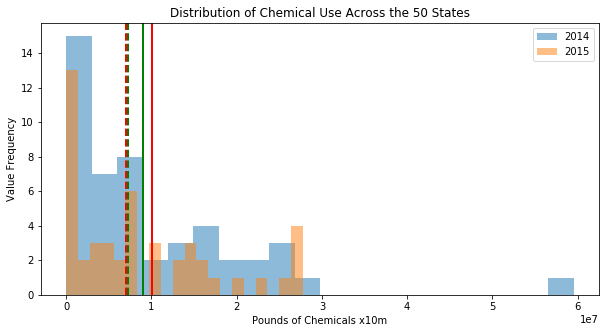

In [8]:
state_stats2014 = df2.groupby('STATE_CODE').sum()
state_stats2015 = df1.groupby('STATE_CODE').sum()

#plot a histogram representing the data by state agricultural chem use
plt.figure(figsize=(10,5))
plt.hist(state_stats2014['HIGH_ESTIMATE'], bins =20, alpha=0.5, label='2014')
plt.axvline(state_stats2014['HIGH_ESTIMATE'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(state_stats2014['HIGH_ESTIMATE'].median(), color='r', linestyle='dashed', linewidth=2)
plt.hist(state_stats2015['HIGH_ESTIMATE'], bins=20, alpha=0.5, label='2015')
plt.axvline(state_stats2015['HIGH_ESTIMATE'].mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(state_stats2015['HIGH_ESTIMATE'].median(), color='g', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.title('Distribution of Chemical Use Across the 50 States')
plt.xlabel('Pounds of Chemicals x10m')
plt.ylabel('Value Frequency')
plt.show()

The above histogram plots the agricultural chemical use by state in both 2014 and 2015. Notice the means represented by the green and red solid lines (2014 = red, 2015 = green), the data is skewed right moving the means with it. Means are influenced by outliers and with California being one of the largest agricultural producers in the US, the 2015 data is undoubtedly affected. 

In [11]:
#build a function to show summary statistics
def summ_stats(state_stats2014):
    print('mean: ', round(np.mean(state_stats2014['HIGH_ESTIMATE'])), 'pounds')
    print('median: ', round(np.median(state_stats2014['HIGH_ESTIMATE'])), 'pounds')
    print('standard deviation: ', round(np.std(state_stats2014['HIGH_ESTIMATE'])), 'pounds')
    
    
print('Summary Stats for 2014')
summ_stats(state_stats2014)

Summary Stats for 2014
mean:  10014031 pounds
median:  6967907.0 pounds
standard deviation:  10948829 pounds


In [12]:
print('Summary Stats for 2015')
summ_stats(state_stats2015)

Summary Stats for 2015
mean:  8955316 pounds
median:  7304058.0 pounds
standard deviation:  8549573 pounds


The above statistics outline the average, median and standard deviation of chemical use per state in all 50 states. For example, in 2014 the average state use of agricultural chemicals was 10,014,031 pounds. Given that the dataset is heavily skewed, the preferred measure of central tendency is the median in this case.

---

# Part 2: Analytic Questions 

1. What agricultural chemicals are the most commonly used in the US? What purpose do they serve?

In [9]:
#group the ag_chem dataframe by compound in the year 2014
estimates = ['HIGH_ESTIMATE']
ag_chem_2014 = ag_chem[ag_chem.YEAR == 2014]
ag_chem_compound2014 = ag_chem_2014.groupby('COMPOUND')[estimates].sum().sort_values(by=estimates, ascending = False).head(20)
ag_chem_compound2014.reset_index(inplace=True)

#group the ag_chem dataframe by compound in the year 2015
ag_chem_2015 = ag_chem[ag_chem.YEAR == 2015]
ag_chem_compound2015 = ag_chem_2015.groupby('COMPOUND')[estimates].sum().sort_values(by=estimates, ascending = False).head(20)
ag_chem_compound2015.reset_index(inplace=True)

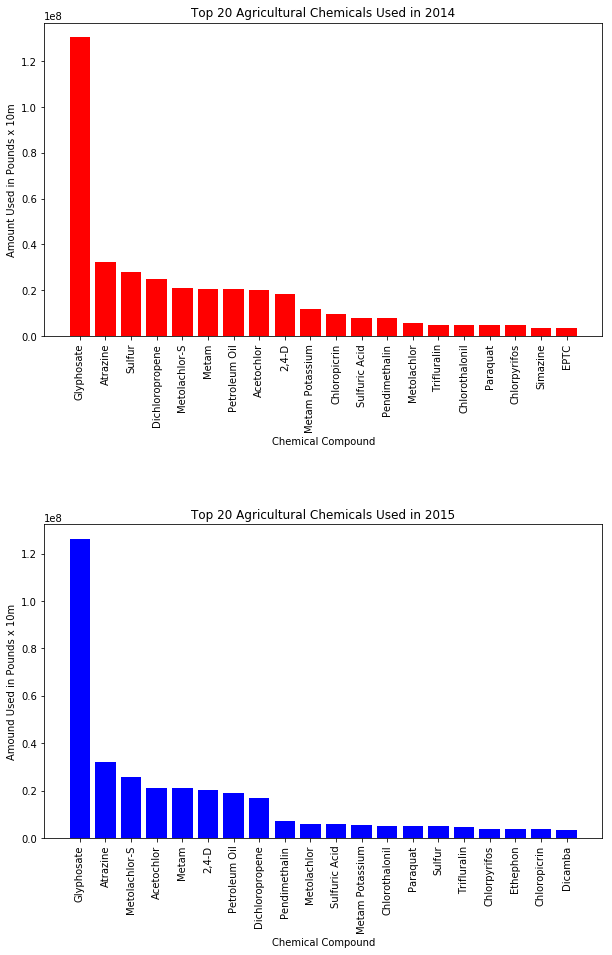

In [11]:
#graph the 2014 and 2015 data
x_2014 = ag_chem_compound2014['COMPOUND']
x_2015 = ag_chem_compound2015['COMPOUND']
indx_2014 = np.arange(len(x_2014))

plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.6)

plt.subplot(2, 1, 1)
plt.bar(x_2014, ag_chem_compound2014['HIGH_ESTIMATE'], color ='red')
plt.xticks(rotation='vertical')
plt.ylabel('Amount Used in Pounds x 10m')
plt.xlabel('Chemical Compound')
plt.title('Top 20 Agricultural Chemicals Used in 2014')

plt.subplot(2, 1, 2)
plt.bar(x_2015, ag_chem_compound2015['HIGH_ESTIMATE'], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Amound Used in Pounds x 10m')
plt.xlabel('Chemical Compound')
plt.title('Top 20 Agricultural Chemicals Used in 2015')


plt.show()

As can be seen from the bar graphs above, glyphosate is the most widely used agricultural chemical in the continental United States. It is the active ingredient in the product "RoundUp", which has been the center of much controversy in recent months due to its possible link to cancer. It is a common herbicide used in the agricultural community to control weeds, which is a major challenge for farmers and homeowners alike. Using 2014 data as a guide, rounding out the top 5 chemicals used are atrazine, sulfur, dichloropropene, and metolachlor-S. Glyphosate, atrazine and metolachlor-S are all herbicides while sulfur is a soil amendment and dichloropropene is nematicide. Sulfur is essential to plant growth and is commonly added to the soil of new plantings. Nematodes are a serious problem in agriculture and feed on the roots of plants killing them quickly, dichloropropene is used to kill off any nematodes present in the soil before planting.

In the top 20 chemicals used in 2015 we see some change, most likely due to California missing from the 2015 dataset. In the top 5, all chemicals are herbicides. 

Another way to look at the most commonly used agricultural chemicals is posted below in a pie chart. 

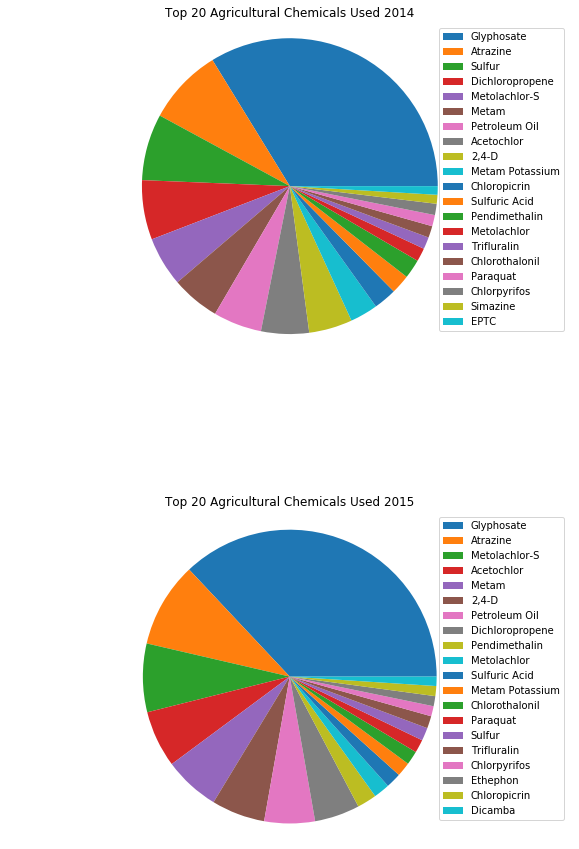

In [12]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.pie(ag_chem_compound2014['HIGH_ESTIMATE'])
plt.legend(x_2014, loc='best')
plt.axis('equal')
plt.title('Top 20 Agricultural Chemicals Used 2014')


plt.subplot(2, 1, 2)
plt.pie(ag_chem_compound2015['HIGH_ESTIMATE'])
plt.legend(x_2015, loc='best')
plt.axis('equal')
plt.title('Top 20 Agricultural Chemicals Used 2015')

plt.show()

Looking at the top 20 chemicals used in the US from a different perspective truly shows how much glyphosate is used in the US in comparison to the other top 20 chemical compounds. More than 25% of the pie is taken up by Glyphosate and almost half of the pie is taken up entirely by herbicides in the 2014 visualization. 

Most of the media and public attention is on pesticide use but what about herbicide use? How do herbicides effect the soil? Are herbicide residues found on the foods we are consuming? If so, what effect, if any, can these chemicals have on our health as a population? 

Now that the top chemical compounds used has been explored, where are these chemical compounds primarily used in the United States?

2. Which states consume the most agricultural chemicals in the US? Which states consume the least?

In [13]:
#filter state dictionary data 
state_data = df4[['STATE_CODE', 'STATE']]
st_codes = ['STATE_CODE']
state_abbv = state_data.groupby('STATE').first().sort_values(by=st_codes, ascending=True).reset_index()

#filter ag_chem data and merge dictionary and chem use data by state code
states_2014 = ag_chem[ag_chem.YEAR == 2014]
states_2014_1 = ag_chem_2014.groupby('STATE_CODE')[estimates].sum()
states_2014_1.reset_index(inplace=True)
states_2014_2 = states_2014_1.merge(state_abbv, on=["STATE_CODE"]).sort_values(by=estimates, ascending=False)
states_2014_2.dropna(inplace=True)

states_2015 = ag_chem[ag_chem.YEAR == 2015]
states_2015_1 = ag_chem_2015.groupby('STATE_CODE')[estimates].sum()
states_2015_1.reset_index(inplace=True)
states_2015_2 = states_2015_1.merge(state_abbv, on=["STATE_CODE"]).sort_values(by=estimates, ascending=False)
states_2015_2.dropna(inplace=True)

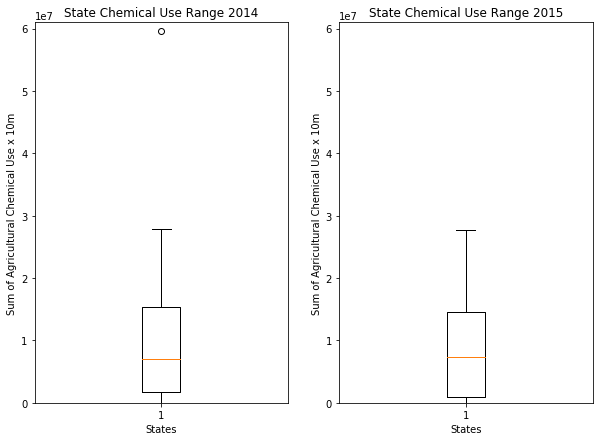

In [29]:
#create a boxplot to display range of state agricultural use values
plt.figure(figsize=(10,7))
plt.subplots_adjust(hspace=.3)

plt.subplot(1, 2, 1)
plt.boxplot(state_stats2014['HIGH_ESTIMATE'])
plt.ylim(0,61000000)
plt.ylabel('Sum of Agricultural Chemical Use x 10m')
plt.xlabel('States')
plt.title('State Chemical Use Range 2014')

plt.subplot(1, 2, 2)
plt.boxplot(state_stats2015['HIGH_ESTIMATE'])
plt.ylim(0,61000000)
plt.ylabel('Sum of Agricultural Chemical Use x 10m')
plt.xlabel('States')
plt.title('State Chemical Use Range 2015')

plt.show()

The boxplots above show the range of values we can expect in the individual state use of agricultural chemicals. Notice the 2014 data has one extreme oulier which can be seen clearly in the bar graph visualizations below. Which state is it?

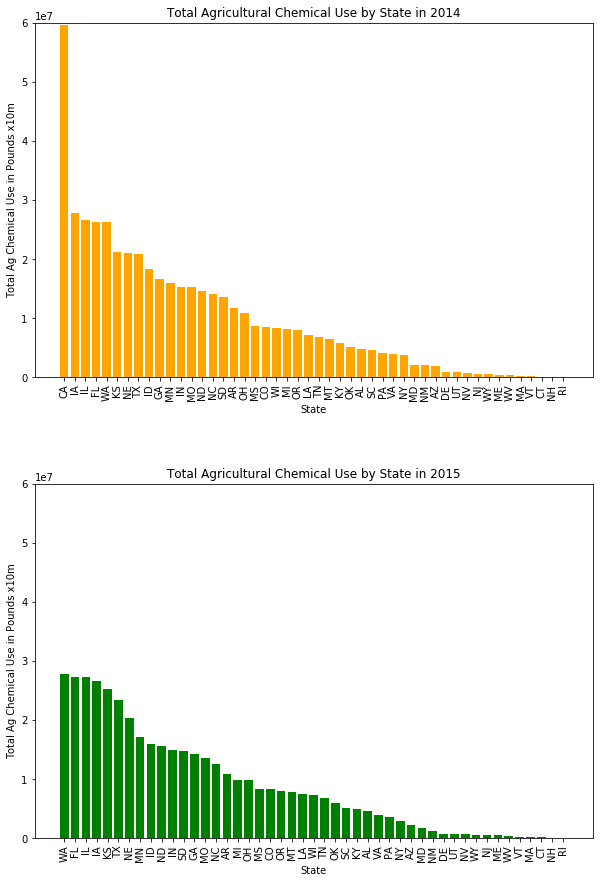

In [18]:
#graph total state use data
x_2014a = states_2014_2['STATE']
x_2015a = states_2015_2['STATE']

plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.3)

plt.subplot(2, 1, 1)
plt.bar(x_2014a, states_2014_2['HIGH_ESTIMATE'], color ='orange')
plt.xticks(rotation='vertical')
plt.ylabel('Total Ag Chemical Use in Pounds x10m')
plt.ylim(0,60000000)
plt.xlabel('State')
plt.title('Total Agricultural Chemical Use by State in 2014')

plt.subplot(2, 1, 2)
plt.bar(x_2015a, states_2015_2['HIGH_ESTIMATE'], color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Total Ag Chemical Use in Pounds x10m')
plt.ylim(0,60000000)
plt.xlabel('State')
plt.title('Total Agricultural Chemical Use by State in 2015')


plt.show()

Total use of agricultural chemicals per state in 2014 and 2015 is depicted above. California is indeed the outlier when analyzing for total chemical use in the US. Rounding out the top five states in 2014 are: Iowa, Illinois, Florida and Washington State. In 2015, taking California out of the equation, the top five states are: Washington, Florida, Illinois, Iowa, and Kansas. 

Notice that in 2014 and 2015, all 5 of the bottom states are in the Northeastern United States - Rhode Island, New Hampshire, Connecticut, Massachusetts, and Vermont. Perhaps this is because of the relative size of these states, their population densities, or lack of farmland. Also notice the strong presence of midwestern states in the top consumers, this is where most of the corn is grown, America's top commodity crop.

How would these visualizations change if state size were taken into account? Perhaps the concentration of agricultural chemicals per square mile can give a different picture of relative state chemical use.

3. Where is one most likely to be exposed to agricultural chemicals? Where are the highest concentrations of chemicals being used in the US? 

In [32]:
#clean square miles data
square_miles = df3[['State and other areas2', 'Total Area Sq. Mi.']]
square_miles.rename(columns={"State and other areas2":"STATE", 
                            "Total Area Sq. Mi.":"Square Miles"}, inplace=True)
square_miles1 = square_miles.copy()[5:56]
square_miles1['Square Miles'] = square_miles1['Square Miles'].str.replace(',', '').astype(float)

In [33]:
#build a dictionary to merge square miles data to ag_chem data
state_abbv_dict = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ',
                  'Arkansas':'AR', 'California':'CA', 'Colorado':'CO',
                  'Connecticut':'CT', 'Delaware':'DE', 'District of Columbia':'DC',
                  'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID',
                  'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS',
                  'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD',
                  'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 
                  'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE',
                  'Nevada':'NV', 'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM',
                  'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH',
                  'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI',
                  'South Carolina':'SC', 'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX',
                  'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 'West Virginia':'WV',
                  'Wisconsin':'WS', 'Wyoming':'WY'}

square_miles1['STATE'] = square_miles1['STATE'].map(state_abbv_dict)

In [34]:
#merge the states data with square miles data
states_data2014 = states_2014_2.merge(square_miles1, on=['STATE'])
states_data2015 = states_2015_2.merge(square_miles1, on=['STATE'])

#create the concentration calculation dataframe
states_data2014['Concentration'] = states_data2014['HIGH_ESTIMATE'] / states_data2014['Square Miles']
states_data2015['Concentration'] = states_data2015['HIGH_ESTIMATE'] / states_data2015['Square Miles']
states_data2014 = states_data2014.sort_values(by=['Concentration'], ascending=False)
states_data2015 = states_data2015.sort_values(by=['Concentration'], ascending=False)

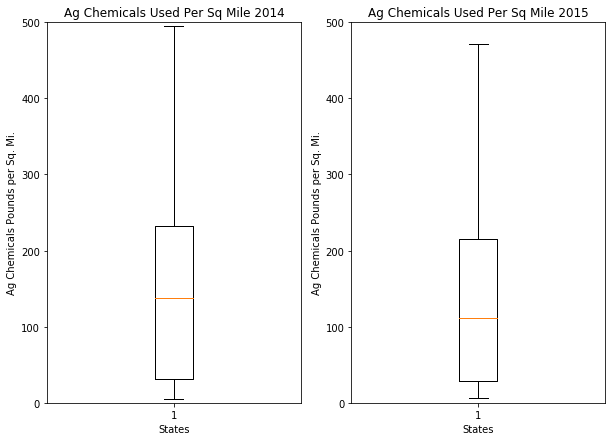

In [35]:
#boxplot to visualize range of chemical concentration values
plt.figure(figsize=(10,7))
plt.subplots_adjust(hspace=.3)

plt.subplot(1, 2, 1)
plt.boxplot(states_data2014['Concentration'])
plt.ylabel('Ag Chemicals Pounds per Sq. Mi.')
plt.xlabel('States')
plt.ylim(0, 500)
plt.title('Ag Chemicals Used Per Sq Mile 2014')

plt.subplot(1, 2, 2)
plt.boxplot(states_data2015['Concentration'])
plt.ylabel('Ag Chemicals Pounds per Sq. Mi.')
plt.xlabel('States')
plt.ylim(0, 500)
plt.title('Ag Chemicals Used Per Sq Mile 2015')


plt.show()

Above boxplots give a visulization of the range of data we can expect in the Ag Chemicals used per square mile analysis. There seems to be a decrease in concentration range from 2014 to 2015 but lets take a closer look below.

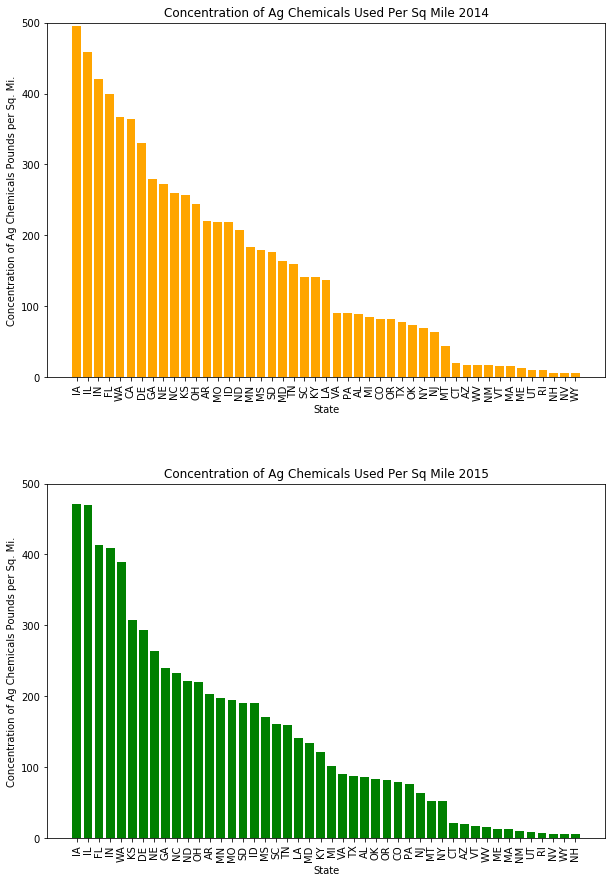

In [36]:
#graph the concentration data
x_2014a = states_data2014['STATE']
x_2015a = states_data2015['STATE']

plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.3)

plt.subplot(2, 1, 1)
plt.bar(x_2014a, states_data2014['Concentration'], color ='orange')
plt.xticks(rotation='vertical')
plt.ylabel('Concentration of Ag Chemicals Pounds per Sq. Mi.')
plt.xlabel('State')
plt.ylim(0,500)
plt.title('Concentration of Ag Chemicals Used Per Sq Mile 2014')

plt.subplot(2, 1, 2)
plt.bar(x_2015a, states_data2015['Concentration'], color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Concentration of Ag Chemicals Pounds per Sq. Mi.')
plt.xlabel('State')
plt.ylim(0,500)
plt.title('Concentration of Ag Chemicals Used Per Sq Mile 2015')


plt.show()

Note that the square mileage data used includes bodies of water and represents the entire area of the state, not just land.

Notice the change from total agricultural chemical use to concentration per square mile. Iowa becomes the most highly concentrated state in the nation when plotting pounds of agricultural chemicals used per square mile. Iowa is the US leader in production of corn and is also a major producer of soybeans. Given Iowa's size, it isn't surprising that it takes the number one spot.

When accounting for state size, notice that in 2014 California falls to number 6. California may be the USA's top consumer of agricultural chemicals but it doesn't crack the top five when considering pounds used per square mile. 

The bottom five states also changed when accounting for square miles. When analyzing total use, all 5 of the bottom states were in the northeast. When accounting for square mileage the bottom 5 changed to: New Hampshire, Wyoming, Nevada, Rhode Island, and Utah. The orders of the bottom concentrated states changed from 2014 to 2015 but the states themselves did not.

One of the most notable jumps when comparing total use to total use per square mile is the state of Deleware. It is a relatively small state but enough agricultural chemicals used per square mile put it in the top 10 concentrations in the US. Doing a little research on Deleware shows that the state primarily grows corn, apples, soybeans and wheat. 

---

# Part 3: Propose Further Research

Building on this report, it would be beneficial to group the chemical compounds by their applications such as pesticide, herbicide, fungicide, fertilizer, etc. With these classifications and more year on year data it could tell more of a story regarding which challenges farmers are facing. For example, an increase in pesticide use could reveal increasing pest and disease challenges. A decrease in fertilizer use could show favorable soil health. What sort of trends are we seeing in the farming community? What challenges are they facing? Answering these questions with some basic statistics and data visualizations could provide future solutions. 

Also, with all the controversy surrounding glyphosate lately one could explore the high concentration areas' lymphoma cases or general health issues. This dataset provides county by county data so focusing on some of the smaller land areas might reveal some interesting trends. It would be interesting to see if there are any correlations between high concentration areas and general health. 

With some more year on year data it would be interesting to run some predictions of specific chemical use. Are we on a downward trend, upward trend or remaining flat? What are the reasons behind these trends? With an increase in population and inevitable increase in crop production, will agricultural chemical use go up? Using some population prediction models, these questions may be answered. How much pesticides will be required in the year 2030 based on population and crop growth? Based on this analysis how can the US become more efficient in agricultural chemical use? These are the types of questions that need to be asked.  

Another piece of information to explore would be to look at the economics of farming. How much chemicals are used per dollar of crop output in the US? Exploring the economic effects of chemical use would be another subject that would be interesting to explore. 

Without agriculture and farming, there is no food. Given today's challenges in farming, innovation in crop production is more important than ever. Are there safer ways to grow our food? Can we be more efficient with current chemicals on the market? Are there better solutions out there? Further research into the data could help drive answers to these questions. 
